In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Pothole-dataset/PotholeDataset.zip'  #Change the zip file name as needed

Archive:  /content/drive/MyDrive/Pothole-dataset/PotholeDataset.zip
   creating: PotholeDataset/test/
  inflating: PotholeDataset/test/1.jpg  
  inflating: PotholeDataset/test/2.jpg  
  inflating: PotholeDataset/test/3.jpg  
  inflating: PotholeDataset/test/4.jpg  
  inflating: PotholeDataset/test/5.jpg  
  inflating: PotholeDataset/test/531.jpg  
  inflating: PotholeDataset/test/593.jpg  
  inflating: PotholeDataset/test/598.jpg  
  inflating: PotholeDataset/test/6.jpg  
  inflating: PotholeDataset/test/602.jpg  
  inflating: PotholeDataset/test/605.jpg  
  inflating: PotholeDataset/test/610.jpg  
  inflating: PotholeDataset/test/617.jpg  
  inflating: PotholeDataset/test/618.jpg  
  inflating: PotholeDataset/test/7.jpg  
  inflating: PotholeDataset/test/8.jpg  
   creating: PotholeDataset/train/
   creating: PotholeDataset/train/Plain/
  inflating: PotholeDataset/train/Plain/1.jpg  
  inflating: PotholeDataset/train/Plain/10.jpg  
  inflating: PotholeDataset/train/Plain/11.jpg  
  in

In [42]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [43]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('PotholeDataset/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

40


In [44]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('PotholeDataset/train/Plain')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

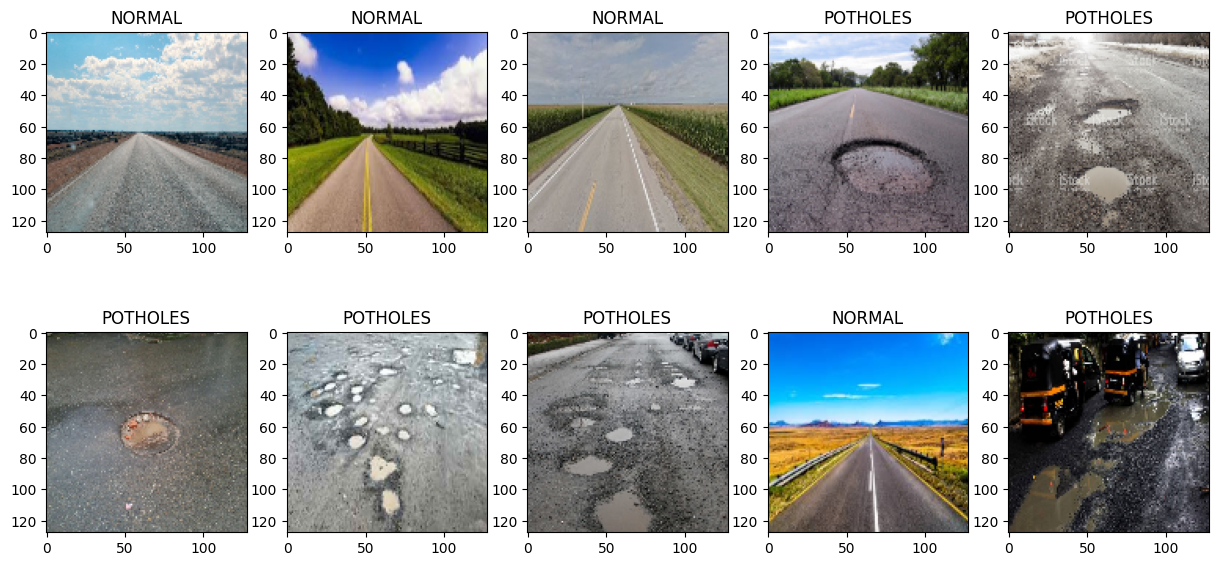

In [45]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [46]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [49]:
# Define the VGG16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers in the pre-trained VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a custom head for your model
x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [50]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2,
                    validation_data=(x_test, y_test))


Epoch 1/30
3/3 - 11s - loss: 7.7688 - accuracy: 0.5667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 11s/epoch - 4s/step
Epoch 2/30
3/3 - 8s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 8s/epoch - 3s/step
Epoch 3/30
3/3 - 9s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 9s/epoch - 3s/step
Epoch 4/30
3/3 - 12s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 12s/epoch - 4s/step
Epoch 5/30
3/3 - 7s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 7s/epoch - 2s/step
Epoch 6/30
3/3 - 9s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 9s/epoch - 3s/step
Epoch 7/30
3/3 - 7s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 7s/epoch - 2s/step
Epoch 8/30
3/3 - 10s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 10s/epoch - 3s/ste

In [ ]:
# Get the final accuracy from the history
final_train_accuracy = history.history['accuracy'][-1] * 100
final_validation_accuracy = history.history['val_accuracy'][-1] * 100

print(f'Final Training Accuracy: {final_train_accuracy:.2f}%')
print(f'Final Validation Accuracy: {final_validation_accuracy:.2f}%')

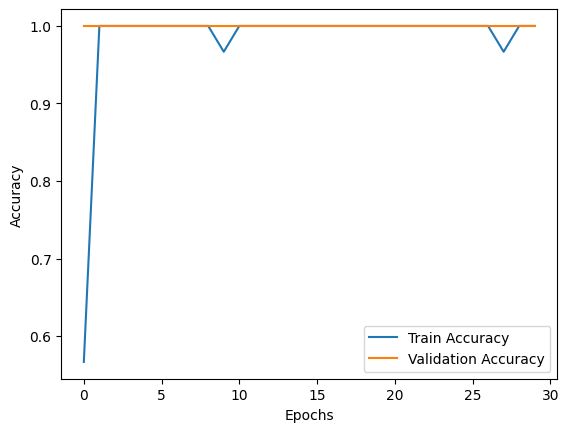

In [51]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 2s 2s/step


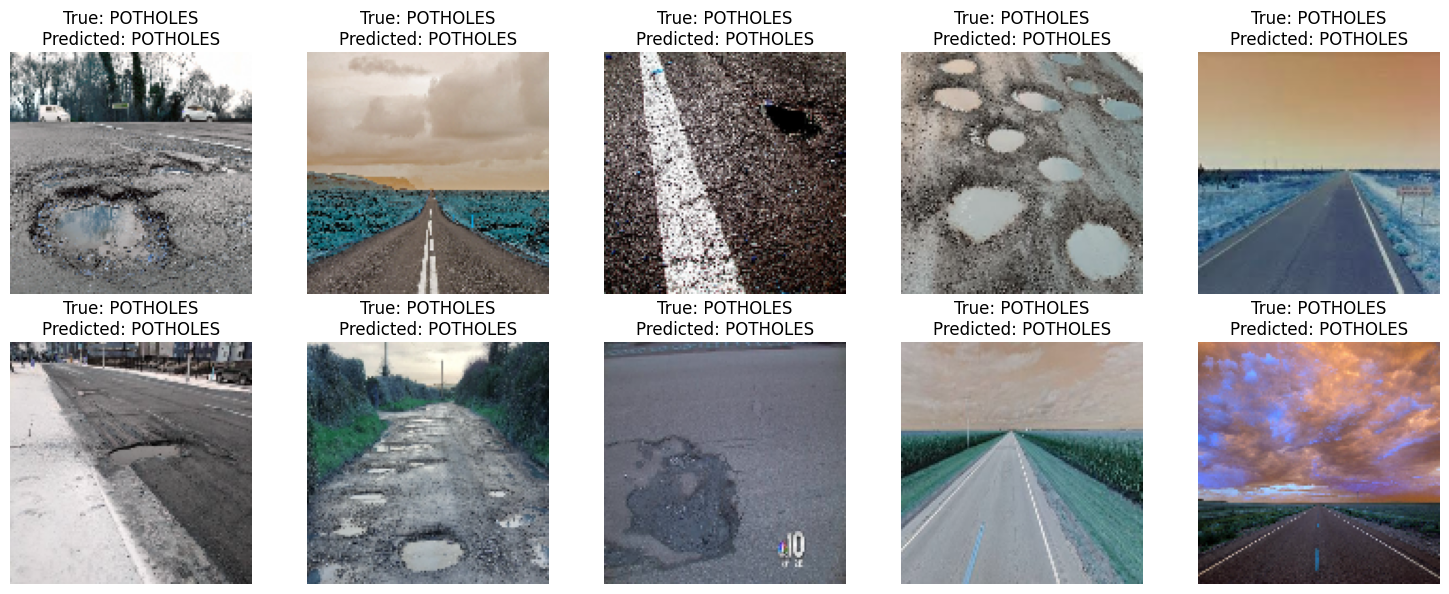

In [54]:
# Display some sample test images with predictions
y_pred = model.predict(x_test)  # Make predictions on the test data

import numpy as np
import matplotlib.pyplot as plt

n_samples = 10  # Number of sample images to display
sample_indices = np.random.choice(len(x_test), n_samples, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    true_label = "NORMAL" if np.all(y_test[idx] == 0) else "POTHOLES"
    pred_label = "NORMAL" if np.all(y_pred[idx] == 0) else "POTHOLES"
    plt.title(f'True: {true_label}\nPredicted: {pred_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
